# **Geo Plot in Python - Step-by-Step Guide**
### Created by [AutonomousEcon](https://autonomousecon.substack.com/publish/home)

This guide will help you create a static choropleth map using Python. We will use the following libraries:

*   geopandas
*   pandas
*   matplotlib




In [ ]:
# Make sure to install these libraries before running the code. If you are using Google Colab, you can install them by running the following command:
!pip install geopandas pandas matplotlib

In [21]:
# Import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import shutil

In [22]:
# Remove any existing directories to avoid prompts
shutil.rmtree('nz_shapefile', ignore_errors=True)

In [ ]:

# Download and unzip the shapefile from GitHub
!wget -O nz_shapefile.zip https://github.com/martingeew/notebook_templates/raw/main/choropleth_map_nz/statsnz-territorial-authority-2023-generalised-SHP.zip
!unzip nz_shapefile.zip -d nz_shapefile


In [24]:
# Verify the contents of the directory
os.listdir('nz_shapefile')

['territorial-authority-2023-generalised.cpg',
 'territorial-authority-2023-generalised-ISO.pdf',
 'territorial-authority-2023-generalised.prj',
 'territorial-authority-2023-generalised.xml',
 'territorial-authority-2023-generalised.shp',
 'territorial-authority-2023-generalised.txt',
 'territorial-authority-2023-generalised.shx',
 'territorial-authority-2023-generalised.dbf']

In [17]:
# Step 1: Read the shapefile
# A shapefile is a popular geospatial vector data format for geographic information system (GIS) software.
# It contains geometric location and associated attribute information for geographic features.
# Here, we'll use an example shapefile hosted on GitHub
# You will see the files uploaded in the folder on the left-hand panel in Google Colab.
# You can also upload your own shapefile directlz in Google Colab iy you like.


shapefile_path = "nz_shapefile/territorial-authority-2023-generalised.shp"
gdf = gpd.read_file(shapefile_path)


In [35]:
# Step 2: Load the demographic share dataset
# Replace the URL with the raw URL to your demographic data file on GitHub.

demographic_data_url = "https://github.com/martingeew/notebook_templates/raw/main/choropleth_map_nz/pop_estimate_shares_processed.csv"
df = pd.read_csv(demographic_data_url)

In [36]:

df.head(5)

,Region,Year,Total_Population,Boomer_Population,Gen X_Population,Gen Z_Population,Millennial_Population,Boomer_Share,Millennial_Share,Gen Z_Share,Gen X_Share,Millennial_Boomer_Share
0,Albert-Eden Local Board Area,1996,86110,23470.0,26770.0,NaN,21990.0,27.255836,25.537104,0.000000,31.088143,52.792939
1,Albert-Eden Local Board Area,2001,89980,21700.0,25920.0,6000.0,25530.0,24.116470,28.372972,6.668148,28.806401,52.489442
2,Albert-Eden Local Board Area,2006,96230,19470.0,25410.0,11770.0,31760.0,20.232776,33.004261,12.231113,26.405487,53.237036
3,Albert-Eden Local Board Area,2013,99970,18940.0,23260.0,19640.0,25770.0,18.945684,25.777733,19.645894,23.266980,44.723417
4,Albert-Eden Local Board Area,2018,103740,16320.0,22040.0,22620.0,27480.0,15.731637,26.489300,21.804511,21.245421,42.220937


In [18]:
# Step 3: Filter out unneeded regions (optional)
# If your shapefile contains regions that you do not want to include in your map, you can filter them out.
# Modify the column name 'TA2023_V_2' and region names as per your data.


filtered_gdf = gdf[
    ~gdf["TA2023_V_2"].isin(["Area Outside Territorial Authority", "Chatham Islands Territory"])
]


In [58]:
# Step 4a: Define the plot function
# This function takes in the demographic data, filtered GeoDataFrame, the year of interest, and the column to plot.

def plot_geodataframe(df, gdf, year, plot_col):

    # Filter for the specified year
    df_plot = df[df['Year'] == year].copy()

    # Ensure you have consistent region names before merging with GeoDataFrame
    gdf_merged = gdf.merge(df_plot, left_on='TA2023_V_2', right_on='Region', how='left')

    # Plot the GeoDataFrame
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf_merged.plot(column=plot_col, ax=ax, legend=False, cmap='OrRd', edgecolor="black")

    # Customize the color bar to make it smaller
    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=gdf_merged[plot_col].min(), vmax=gdf_merged[plot_col].max()))
    sm._A = []
    cbar = fig.colorbar(sm, ax=ax, shrink=0.65)  # Adjust shrink to make the color bar smaller

    # Customize the color bar properties
    cbar.ax.tick_params(color="#333333", labelcolor="#333333")  # Change the color of the ticks and labels
    cbar.outline.set_edgecolor("#333333")  # Change the edge color of the color bar

    # Customize the plot
    ax.set_title(f'{plot_col.replace("_", " ")} by Region in {year} (percent)', loc='left', fontsize=18, fontname='DejaVu Sans Mono',color="#333333")
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Add a source footer
    plt.annotate('Source: StatisticsNZ', xy=(1, -0.1), xycoords='axes fraction', ha='center', fontsize=12, fontname='DejaVu Sans Mono', color="#333333")

    # Save the plot as an image
    dpi = 100  # Dots per inch
    # fig.set_size_inches(627/dpi, 1200/dpi)  # Convert pixels to inches (Optional to choose the dimensions in pixels).
    plt.savefig('choropleth_nz', dpi=dpi, bbox_inches='tight', facecolor=fig.get_facecolor())

    # Show the plot
    plt.show()

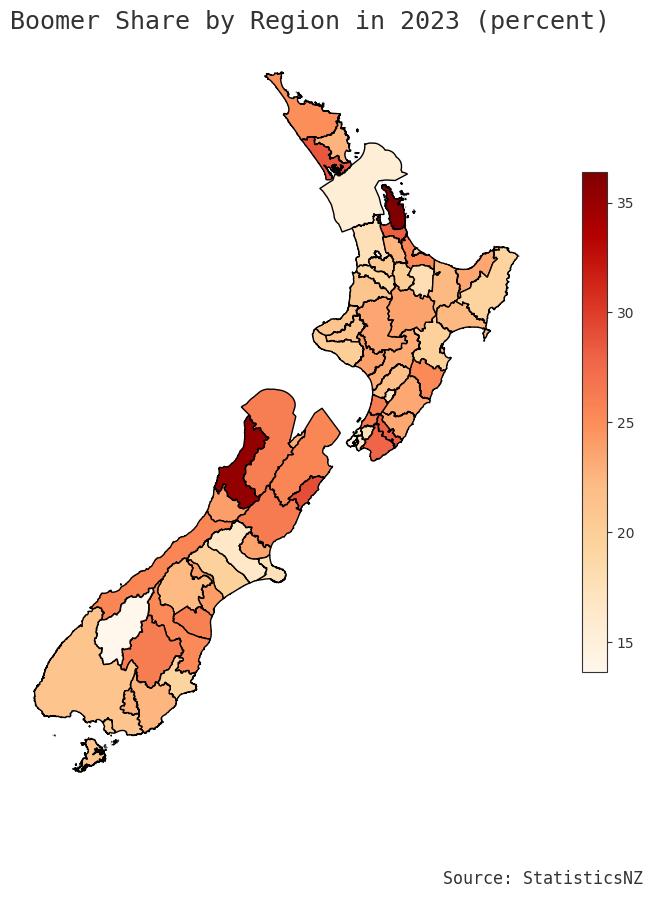

In [59]:
# Step 4b: Plot the data
# Replace 'Boomer_Share' with the column name from your demographic data that you want to plot.
# Similarly, replace '2023' with the year of interest.

plot_geodataframe(df, filtered_gdf, 2023, 'Boomer_Share')


In [73]:
# Step 5a: The same function but cutomized for dark mode
def plot_geodataframe_dark(df, gdf, year, plot_col):
    # Filter for the specified year
    df_plot = df[df['Year'] == year].copy()

    # Ensure you have consistent region names before merging with GeoDataFrame
    gdf_merged = gdf.merge(df_plot, left_on='TA2023_V_2', right_on='Region', how='left')

    # Plot the GeoDataFrame
    fig, ax = plt.subplots(figsize=(10, 10), facecolor='#282a36')
    fig.patch.set_facecolor('#282a36')  # Set the figure background color
    ax.set_facecolor('#282a36')  # Set the axes background color
    gdf_merged.plot(column=plot_col, ax=ax, legend=False, cmap='OrRd', edgecolor='white')

    # Customize the color bar to make it smaller
    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=gdf_merged[plot_col].min(), vmax=gdf_merged[plot_col].max()))
    sm._A = []
    cbar = fig.colorbar(sm, ax=ax, shrink=0.65)  # Adjust shrink to make the color bar smaller

    # Customize the color bar properties
    cbar.ax.tick_params(color='white', labelcolor='white')  # Change the color of the ticks and labels
    cbar.outline.set_edgecolor('white')  # Change the edge color of the color bar

    # Customize the plot
    ax.set_title(f'{plot_col.replace("_", " ")} by Region in {year} (percent)', loc='left', fontsize=18, fontname='DejaVu Sans Mono', color='white')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Add a source footer
    plt.annotate('Source: StatisticsNZ', xy=(1, -0.1), xycoords='axes fraction', ha='center', fontsize=12, fontname='DejaVu Sans Mono', color='white')

    # Save the plot as an image
    dpi = 100  # Dots per inch
    # fig.set_size_inches(627/dpi, 1200/dpi)  # Convert pixels to inches (Optional to choose the dimensions in pixels).
    plt.savefig('dark_choropleth_nz', dpi=dpi, bbox_inches='tight', facecolor=fig.get_facecolor())

    # Show the plot
    plt.show()


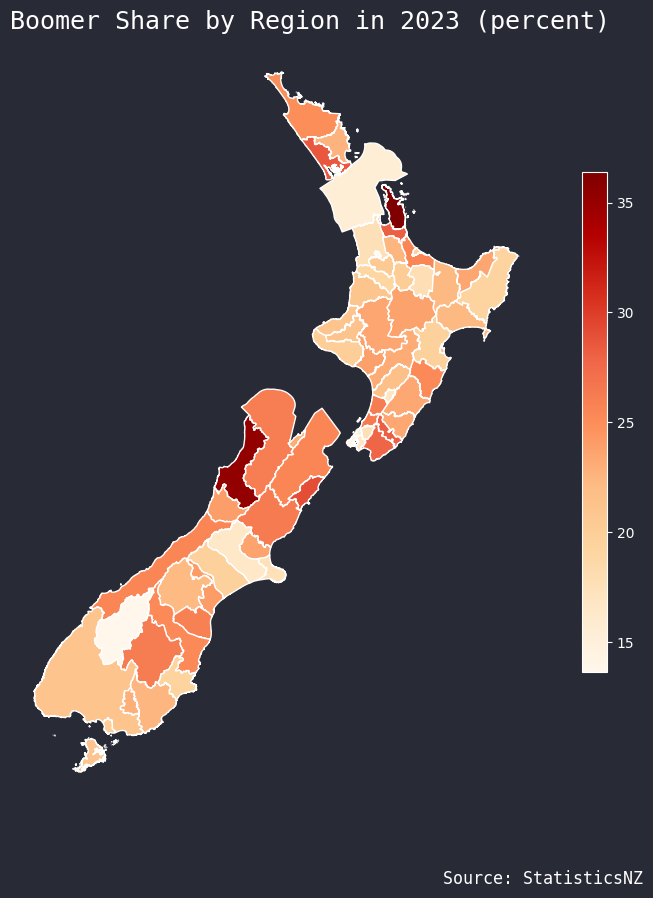

In [74]:
# Step 5b: Plot the data in dark mode
plot_geodataframe_dark(df, filtered_gdf, 2023, 'Boomer_Share')